In [5]:
import pandas as pd 

df = pd.read_csv('./ConstantData/0618_Ai_ONU16.csv')
#df.head()

df['Ai'] = df['Ai'] / 9375 #手動正規化
print(df[:20])

# 将dataframe 转化为 array
data = df.values

          Ai
0   1.000000
1   1.000000
2   0.933333
3   1.000000
4   1.000000
5   0.933333
6   1.000000
7   1.000000
8   0.933333
9   1.000000
10  1.000000
11  1.000000
12  0.933333
13  1.000000
14  1.000000
15  0.933333
16  1.000000
17  1.000000
18  1.000000
19  0.933333


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [7]:
# 1 : 数据切分
result = []
time_steps = 65 #33 65 129

for i in range(len(data)-time_steps):
    result.append(data[i:i+time_steps])

result = np.array(result)

In [8]:
# 训练集和测试集的数据量划分
train_size = int(0.8*len(result))

# 训练集切分
train = result[:train_size,:]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
   
x_test = result[train_size:,:-1]
y_test = result[train_size:,-1][:,-1]

feature_nums = len(df.columns)

# 数据重塑
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (8108, 64, 1)
y_train (8108,)
X_test (2027, 64, 1)
y_test (2027,)


In [9]:
from __future__ import print_function
import math
#importing keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D, Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#def build_model(input):
#    model = Sequential()
#    model.add(Dense(128,input_shape=(input[0],input[1])))
#    model.add(Conv1D(filters=80,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform"))
#    model.add(MaxPooling1D(pool_size=2,padding='valid'))
#    model.add(Conv1D(filters=48,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform"))
#    model.add(MaxPooling1D(pool_size=2, padding='valid'))
#    model.add(LSTM(32,return_sequences=True))
#    model.add(LSTM(16,return_sequences=False))
#    model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
#    model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
#    model.compile(loss='mse',optimizer='adam',metrics=['mae'])
#    return model

timesteps_ = time_steps - 1
inputs = Input(shape=(timesteps_, ))
tgt1 = tf.keras.layers.Reshape((timesteps_, 1), input_shape=(timesteps_, ))(inputs)

tgt1 = Dense(units=32, input_shape=(timesteps_, 1))(tgt1)
#1st CNN Layer
tgt2 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(tgt1)
tgt3 = MaxPooling1D(pool_size=2,padding='valid')(tgt2)
#2nd CNN Layer
tgt4 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(tgt3)
tgt5 = MaxPooling1D(pool_size=2, padding='valid')(tgt4)

#tgt6 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(tgt5)
#tgt7 = MaxPooling1D(pool_size=2, padding='valid')(tgt6)
#1st LSTM Layer
#tgt6 = LSTM(32,return_sequences=True)(tgt5) #32
#tgt6_2 = LSTM(30,return_sequences=True)(tgt6) #32
#tgt6_3 = LSTM(22,return_sequences=True)(tgt6_2) #32
#tgt7 = LSTM(16,return_sequences=False)(tgt6) #16
#Dense
tgt6 = Flatten()(tgt5)
#tgt8 = Flatten()(tgt7)
#tgt7 = Dense(32, activation="relu", kernel_initializer="uniform")(tgt6)
predictions = Dense(1, activation="relu", kernel_initializer="uniform")(tgt6)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mse',optimizer='Adam',metrics=['mae'])

In [10]:
#model = build_model([9,1,1]) #[x_train shape的第二個數字, x_train shape的第三個數字, 1]
#Summary of the Model
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 64, 1)             0         
_________________________________________________________________
dense (Dense)                (None, 64, 32)            64        
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 32)            1056      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 32, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 32)            1056      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 32)           

In [11]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=100,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/100
102/102 - 0s - loss: 0.0652 - mae: 0.1387 - val_loss: 9.2505e-04 - val_mae: 0.0270
Epoch 2/100
102/102 - 0s - loss: 9.3008e-04 - mae: 0.0277 - val_loss: 9.3141e-04 - val_mae: 0.0265
Epoch 3/100
102/102 - 0s - loss: 9.2725e-04 - mae: 0.0277 - val_loss: 9.2444e-04 - val_mae: 0.0271
Epoch 4/100
102/102 - 0s - loss: 9.3260e-04 - mae: 0.0277 - val_loss: 9.2792e-04 - val_mae: 0.0286
Epoch 5/100
102/102 - 0s - loss: 9.3019e-04 - mae: 0.0277 - val_loss: 9.2720e-04 - val_mae: 0.0286
Epoch 6/100
102/102 - 0s - loss: 9.4172e-04 - mae: 0.0276 - val_loss: 9.7367e-04 - val_mae: 0.0306
Epoch 7/100
102/102 - 0s - loss: 9.4393e-04 - mae: 0.0278 - val_loss: 9.2355e-04 - val_mae: 0.0273
Epoch 8/100
102/102 - 0s - loss: 9.4916e-04 - mae: 0.0278 - val_loss: 0.0010 - val_mae: 0.0239
Epoch 9/100
102/102 - 0s - loss: 9.4608e-04 - mae: 0.0276 - val_loss: 9.5580e-04 - val_mae: 0.0253
Epoch 10/100
102/102 - 0s - loss: 9.4269e-04 - mae: 0.0276 - val_loss: 9.2892e-04 - val_mae: 0.0266
Epoch 11/100
102/

Epoch 85/100
102/102 - 0s - loss: 9.8079e-04 - mae: 0.0280 - val_loss: 0.0010 - val_mae: 0.0238
Epoch 86/100
102/102 - 0s - loss: 9.7598e-04 - mae: 0.0277 - val_loss: 9.4546e-04 - val_mae: 0.0296
Epoch 87/100
102/102 - 0s - loss: 0.0010 - mae: 0.0276 - val_loss: 9.3466e-04 - val_mae: 0.0291
Epoch 88/100
102/102 - 0s - loss: 9.7561e-04 - mae: 0.0275 - val_loss: 9.2741e-04 - val_mae: 0.0286
Epoch 89/100
102/102 - 0s - loss: 9.9471e-04 - mae: 0.0276 - val_loss: 9.2312e-04 - val_mae: 0.0280
Epoch 90/100
102/102 - 0s - loss: 9.9348e-04 - mae: 0.0276 - val_loss: 9.6289e-04 - val_mae: 0.0303
Epoch 91/100
102/102 - 0s - loss: 9.6267e-04 - mae: 0.0278 - val_loss: 9.6798e-04 - val_mae: 0.0305
Epoch 92/100
102/102 - 0s - loss: 0.0010 - mae: 0.0278 - val_loss: 9.2556e-04 - val_mae: 0.0270
Epoch 93/100
102/102 - 0s - loss: 9.8219e-04 - mae: 0.0276 - val_loss: 9.4142e-04 - val_mae: 0.0295
Epoch 94/100
102/102 - 0s - loss: 9.4034e-04 - mae: 0.0277 - val_loss: 9.7007e-04 - val_mae: 0.0248
Epoch 95/100

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

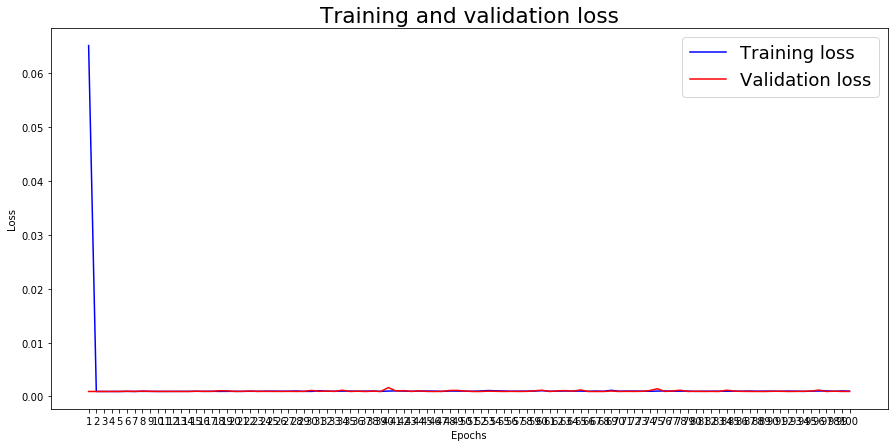

In [13]:
# 画出训练集和验证集的损失曲线

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

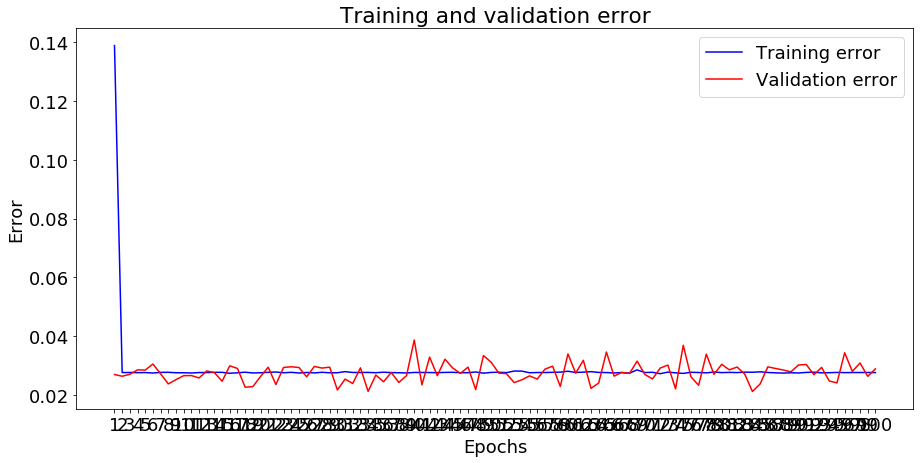

In [14]:
# 画出训练集和验证集的误差图像

#mae = history_dict['mean_absolute_error']
#vmae = history_dict['val_mean_absolute_error']
mae = history.history['mae']
vmae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [15]:
model.metrics_names

['loss', 'mae']

In [16]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [17]:
#predicting values for y_test
p = model.predict(x_test)

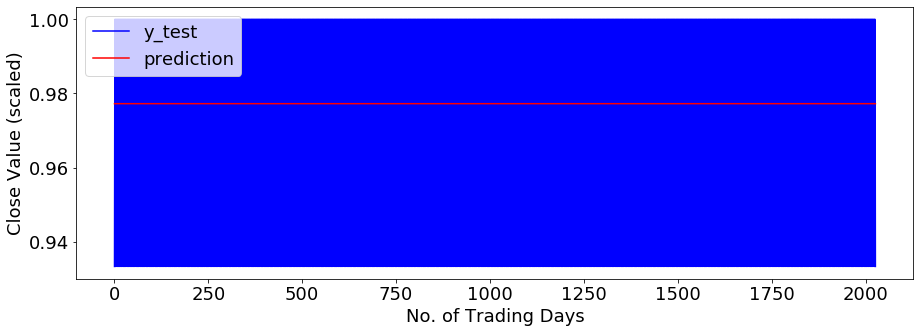

In [18]:
plt.plot(y_test,color='blue', label='y_test')
plt.plot(p,color='red', label='prediction')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [19]:
p1= model.predict(x_train)

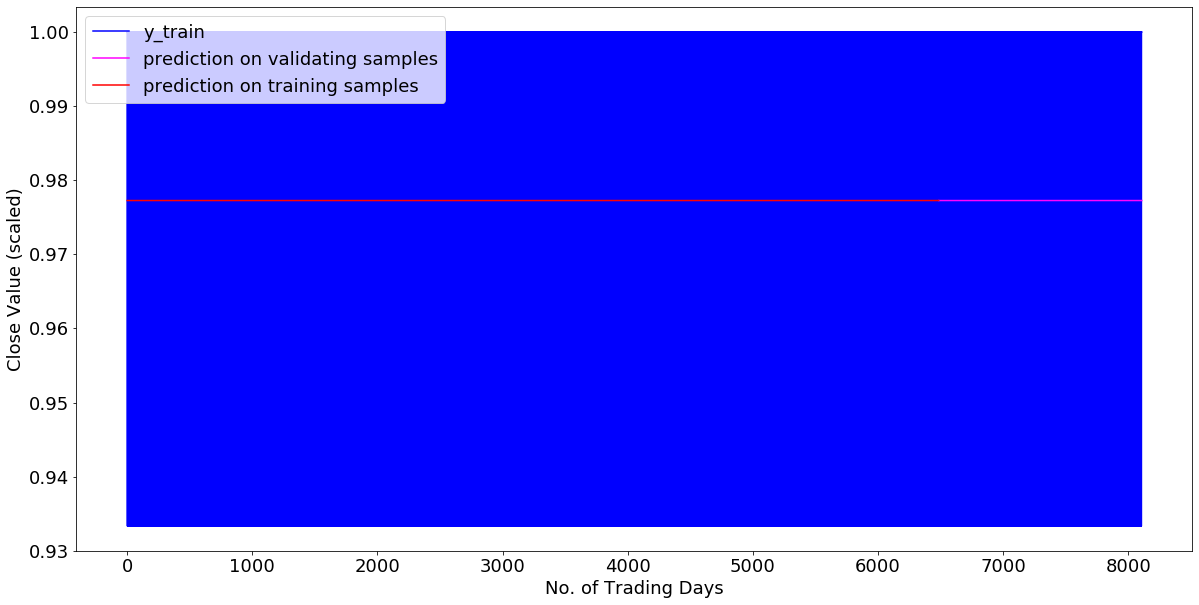

In [20]:
plt.plot(y_train,color='blue', label='y_train')
x = np.array(range(6486,8108)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
plt.plot(x,p1[6486:],color = 'magenta',label ='prediction on validating samples') #p1[數字:] 數字代表x_train shape第一個數字的0.8倍
plt.plot(p1[:6486],color='red', label='prediction on training samples')
#x = np.array(range(29512,36890)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
#plt.plot(x,p1[29512:],color = 'magenta',label ='prediction on validating samples')
#plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()

In [21]:
#手動正規化
y = y_test * 9375   # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模
y_pred = p.reshape(2027)  # 测试集数据大小为265
y_pred = y_pred * 9375   # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.030536044 		 0.028972249 		 0.030547452 		 0.028982682


In [24]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 271.712598186 			 2.990664297


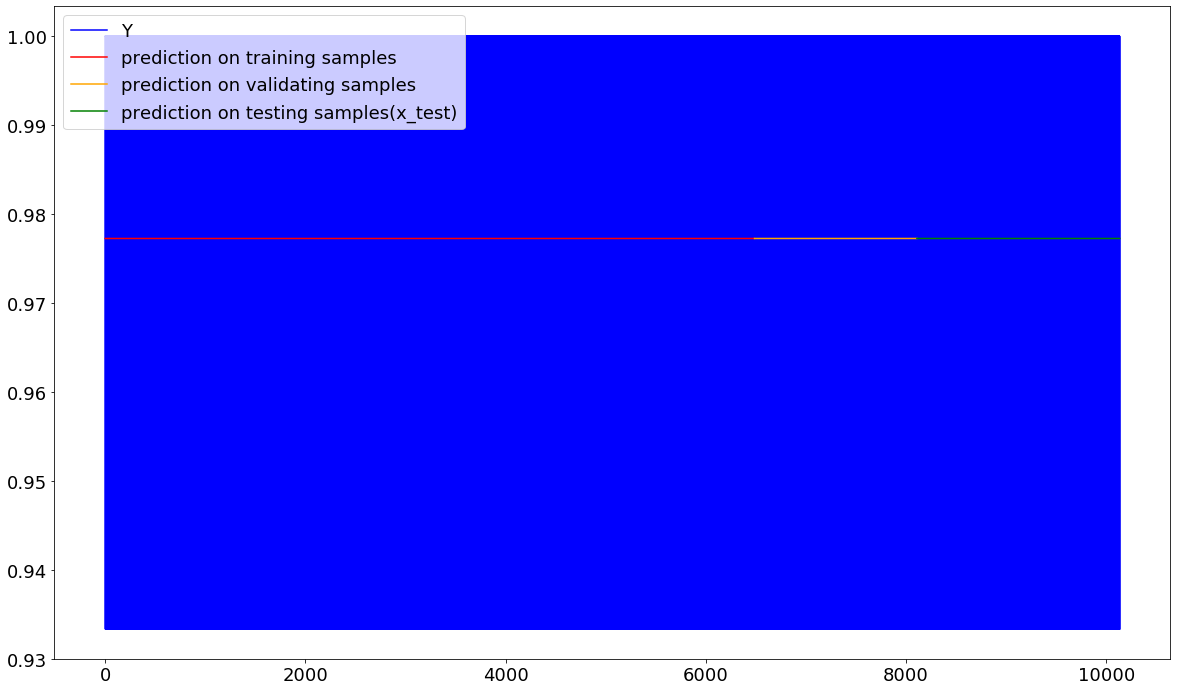

In [25]:
Y = np.concatenate((y_train,y_test),axis = 0)
plt.plot(Y,color='blue', label='Y')
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:6486],color='red', label='prediction on training samples') #p[:數字] 數字代表x_train shape第一個數字的0.8倍
#for validating samples
z = np.array(range(6486,8108)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
plt.plot(z,P[6486:8108],color = 'orange',label ='prediction on validating samples') #P[x_train shape第一個數字的0.8倍:x_train shape第一個數字]
#for testing samples
x = np.array(range(8108,10135)) #range(x_train shape第一個數字, x_train shape第一個數字 + x_test shape第一個數字)
plt.plot(x,P[8108:],color = 'green',label ='prediction on testing samples(x_test)') #p[數字:] 數字代表x_train shape第一個數字

#plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [26]:
model.save('./ConstantData/0623_U08D00_CT_CNN_ONU16_onuAi_9375_2layer3232_timesteps64.h5', include_optimizer=False)